## The 2008 Iowa River Flood
For this activity I will be exploring the flood that ocurred along the Iowa River in June, 2008. I decided to pick this flood event because it took place during a time when I was in graduate school at the University of Iowa. This flood significantly impacted the University causing millions of dollars in damage to the campus and community in Iowa City. 

I'll be looking at a USGS gage near IIHR, the College of Engineering's Hydrualics & Hydrology Lab at the Univesity of Iowa and home to the Iowa Flood Center. This is where I attended graduate school for my master's degree and is one of the oldest water resource engineering labs in the United States. 


Here are some articles about the flood: 
* [How the University of Iowa Recovered From the ‘Unfathomable’ Flood That Ruined It](https://www.nytimes.com/2019/05/10/climate/iowa-floods-disasters-lessons-learned.html)
* [10 years later, the collective memory of the 2008 flood remains](https://dailyiowan.com/2018/06/13/10-years-later-the-collective-memory-of-the-2008-flood-remains/)
* [Flood of 2008 caused 'wild scramble' in Iowa City, Coralville](https://www.thegazette.com/government-politics/flood-of-2008-caused-wild-scramble-in-iowa-city-coralville/)
* [BTN LIVEBIG: IOWA COLLECTS A 'FLOOD' OF DATA ON WATER LEVELS](https://btn.com/2015/10/09/btn-livebig-iowa-collects-a-flood-of-data-on-water-levels/)
* [Floods of May and June 2008 in Iowa (USGS)](https://pubs.usgs.gov/of/2010/1096/pdf/OFR2010-1096.pdf)

Here are some images of the flood on the University of Iowa campus, and at IIHR (last photo):
![](https://engineering.uiowa.edu/sites/engineering.uiowa.edu/files/styles/ultrawide__2592_x_1111/public/2021-03/field/image/ar-080616-tj-049-1200_0.jpg?h=242cd5c8&itok=I8iWQGGt)

![](https://static01.nyt.com/images/2019/05/09/climate/09CLI-IOWAFLOODS-aerial/09CLI-IOWAFLOODS-aerial-superJumbo.jpg?quality=75&auto=webp)

![](https://btn.com/wp-content/uploads/2015/10/iowa_floodcenter.jpg)

In [1]:
import folium
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import os
import pathlib
import requests
import subprocess
import pandas as pd

from matplotlib.dates import DateFormatter

In [2]:
# Folium map of gage location on Iowa River at Iowa City, IA

# Define lat/lon of gage location
sg_lat = 41.6566833
sg_lon = -91.541

# Initialize map and tweak settings
my_map = folium.Map(
    # Location to display
    location=(sg_lat, sg_lon),
    # Turns off annoying zooming while trying to scroll to the next cell
    scrollWheelZoom=False)

# Put a marker at the stream gauge location
folium.Marker([sg_lat, sg_lon], popup="USGS River Gage; Iowa River; Iowa City, IA").add_to(my_map)

# Display the map
my_map

In [3]:
# Define URL to data
iihr_url = ('https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb'
            '&site_no=05454500&legacy=&referred_module=sw&period='
            '&begin_date=1903-06-01&end_date=2023-06-08')
iihr_url

'https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=05454500&legacy=&referred_module=sw&period=&begin_date=1903-06-01&end_date=2023-06-08'

In [4]:
# Download data using a GET HTTP Request
iihr_data = requests.get(iihr_url)
iihr_data    

<Response [200]>

In [5]:
# Take a look at the data. What got downloaded?
for i, line in enumerate(iihr_data.content.splitlines()[:35]):
    if not line.startswith(b'#'):
        print(i, line)

27 b'agency_cd\tsite_no\tdatetime\t42884_00060_00003\t42884_00060_00003_cd'
28 b'5s\t15s\t20d\t14n\t10s'
29 b'USGS\t05454500\t1903-06-01\t17800\tA'
30 b'USGS\t05454500\t1903-06-02\t21700\tA'
31 b'USGS\t05454500\t1903-06-03\t21700\tA'
32 b'USGS\t05454500\t1903-06-04\t20000\tA'
33 b'USGS\t05454500\t1903-06-05\t18000\tA'
34 b'USGS\t05454500\t1903-06-06\t15600\tA'


In [6]:
# Open data using pandas
iowa_river_flow = pd.read_csv(
    BytesIO(iihr_data.content),
    comment='#',
    delimiter='\t', 
    skiprows=[27,28],
    names=['Agency', 'Site ID', 'Date', 'Discharge', 'Code'],
    index_col='Date',
    parse_dates=True,
)

iowa_river_flow

,Agency,Site ID,Discharge,Code
Date,,,,
1903-06-01,USGS,5454500,17800.0,A
1903-06-02,USGS,5454500,21700.0,A
1903-06-03,USGS,5454500,21700.0,A
1903-06-04,USGS,5454500,20000.0,A
1903-06-05,USGS,5454500,18000.0,A
...,...,...,...,...
2023-06-04,USGS,5454500,1260.0,A
2023-06-05,USGS,5454500,1350.0,A
2023-06-06,USGS,5454500,1540.0,A


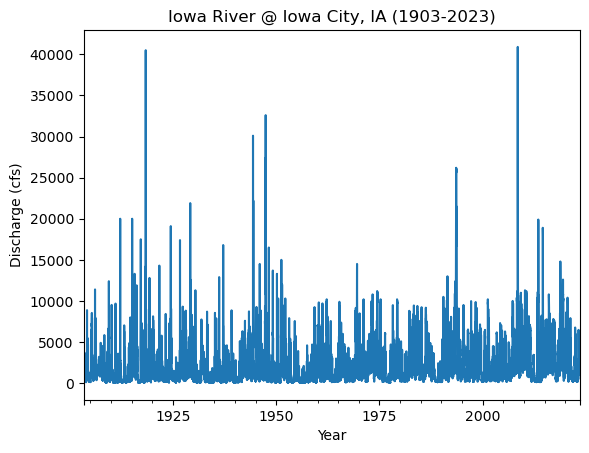

In [7]:
# Plot the data using .plot
iowa_river_flow.plot(y='Discharge',
                     ylabel='Discharge (cfs)',
                     legend=False,
                     xlabel='Year',
                     title='Iowa River @ Iowa City, IA (1903-2023)')
plt.show()

In [8]:
# Subset data to 2008
ia_river_2008 = iowa_river_flow.loc['2008']
ia_river_2008

,Agency,Site ID,Discharge,Code
Date,,,,
2008-01-01,USGS,5454500,1660.0,A
2008-01-02,USGS,5454500,1490.0,A
2008-01-03,USGS,5454500,1250.0,A
2008-01-04,USGS,5454500,1100.0,A
2008-01-05,USGS,5454500,1110.0,A
...,...,...,...,...
2008-12-27,USGS,5454500,2240.0,A
2008-12-28,USGS,5454500,2330.0,A
2008-12-29,USGS,5454500,2910.0,A


In [9]:
# What is the maximum value of this data?
ia_river_2008.max()

Agency          USGS
Site ID      5454500
Discharge    40900.0
Code             A:e
dtype: object

<Axes: xlabel='Date'>

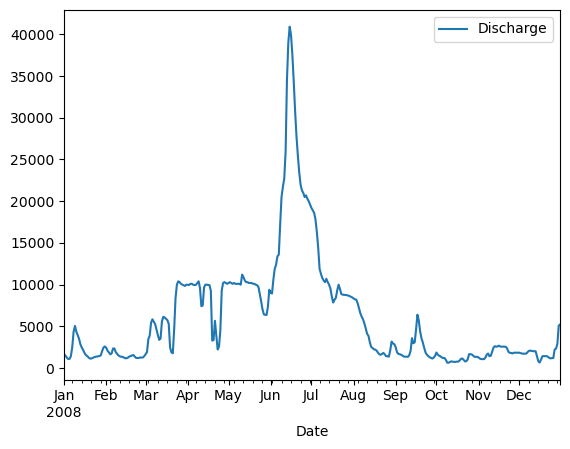

In [10]:
# Plot the data using pandas
ia_river_2008.plot(y='Discharge')

In [11]:
# Resample data to look at annual maximum discharge
ia_river_annual_max = iowa_river_flow[['Discharge']].resample('Y').max()
ia_river_annual_max

,Discharge
Date,
1903-12-31,21700.0
1904-12-31,8880.0
1905-12-31,8540.0
1906-12-31,11400.0
1907-12-31,4900.0
...,...
2019-12-31,12600.0
2020-12-31,10400.0
2021-12-31,7910.0


In [12]:
# What is the maximum value?
ia_river_annual_max.max()

Discharge    40900.0
dtype: float64

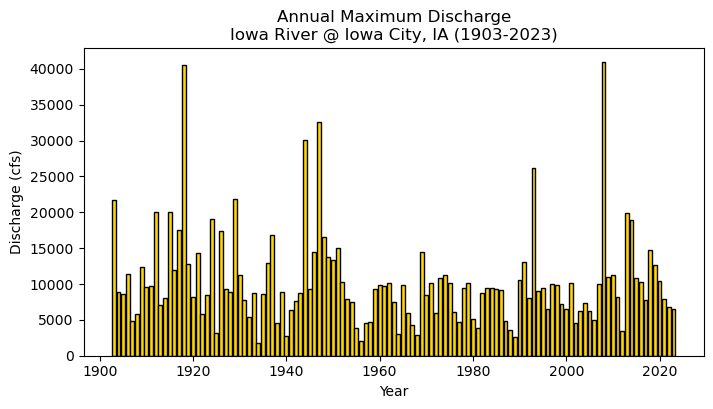

In [13]:
# Plot the data using matplotlib

# Define figure (fig) and axis (ax) objects
fig, ax = plt.subplots(figsize=(8,4))

# Create bar plot using ax.bar
ax.bar(ia_river_annual_max.index.year.values,
       ia_river_annual_max['Discharge'],
       color = 'gold',
       edgecolor='black')

# Define axis title and labels
ax.set(title="Annual Maximum Discharge\nIowa River @ Iowa City, IA (1903-2023)",
       xlabel="Year",
       ylabel='Discharge (cfs)')

plt.show()

In [14]:
# What is the value of the df @ row 105 (aka 2008)?
ia_river_annual_max.iloc[105,:]

Discharge    40900.0
Name: 2008-12-31 00:00:00, dtype: float64

In [15]:
# How many rows in this data?
len(ia_river_annual_max)

121

### Plot description
In 2008, the Iowa River saw the largest annual maximum discharge on record (40,900 cfs), going back to 1903 (121 years). Based on these data, this flooding event would be a 1 in 121 year flood, and would have a 0.008% (~1/122) liklihood of happening in any given year.

In [16]:
# Sort data smallest to largest
ia_river_discharge_sorted = ia_river_annual_max.sort_values(by="Discharge")

# Count total obervations
n = ia_river_discharge_sorted.shape[0]

# Add a numbered column 1 -> n to use in return calculation for rank
ia_river_discharge_sorted.insert(0, 'rank', range(1, 1 + n))

# Calculate probability - note you may need to adjust this value based upon the time period of your data
ia_river_discharge_sorted["probability"] = (
    (n - ia_river_discharge_sorted["rank"] + 1) / (n + 1))
ia_river_discharge_sorted["return-years"] = (
    1 / ia_river_discharge_sorted["probability"])

ia_river_discharge_sorted

,rank,Discharge,probability,return-years
Date,,,,
1934-12-31,1,1840.0,0.991803,1.008264
1956-12-31,2,2100.0,0.983607,1.016667
1989-12-31,3,2670.0,0.975410,1.025210
1940-12-31,4,2800.0,0.967213,1.033898
1968-12-31,5,2920.0,0.959016,1.042735
...,...,...,...,...
1993-12-31,117,26200.0,0.040984,24.400000
1944-12-31,118,30100.0,0.032787,30.500000
1947-12-31,119,32600.0,0.024590,40.666667


In [17]:
%%capture
%%bash
jupyter nbconvert 08-iowa-flood.ipynb --to html